## How to Import Stata Files in Python using Pandas

In [23]:
import pyreadstat

dtafile = './SimData/FifthDayData.dta'
df, meta = pyreadstat.read_dta(dtafile,
                              usecols=['index', 'Gender', 'Name', 'ID',
                                      'Response'])

In [24]:
df.head()

,index,ID,Name,Response,Gender
0,0,1,John,0.453733,0
1,1,2,Billie,0.257360,0
2,2,3,Robert,0.443393,0
3,3,4,Don,0.423592,0
4,4,5,Joseph,0.571355,0


In [6]:
meta.__doc__

'\n    This class holds metadata we want to give back to python\n    '

In [8]:
import pandas as pd

### Import .dta file
Here we use pandas read_stata to read a .dta file to a Pandas datframe. Note, you need to download the FifthDayData.dta from here and put it in a subfolder, to this notebook, called "SimData". Another option is to change the dtafile to wherever your .dta file is.

In [9]:
dtafile = './SimData/FifthDayData.dta'

df = pd.read_stata(dtafile)
df.head()

df.tail()

,index,ID,Name,Day,Age,Response,Gender
195,195,196,Francisca,Fifth,27,0.260849,1
196,196,197,Nia,Fifth,20,0.431105,1
197,197,198,Christina,Fifth,29,0.231316,1
198,198,199,Marta,Fifth,26,0.424948,1
199,199,200,Julia,Fifth,25,0.280474,1


### Reading a STATA file and specifying the index column
As can be seen in the image above, there's a column named index. We use the parameter *index_col* to set this column as index:

In [ ]:
dtafile = './SimData/FifthDayData.dta'

df = pd.read_stata(dtafile, index_col='index')
df2 = display( HTML( df.head().style.render()))

### Import Stata Files from URLs
Here we read a Stata file from a URL:

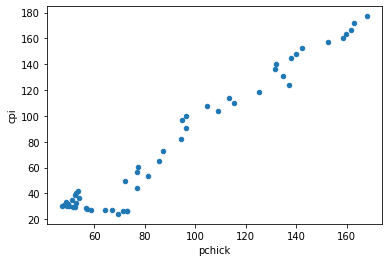

In [32]:
%matplotlib inline
url = 'http://www.principlesofeconometrics.com/stata/broiler.dta'

df = pd.read_stata(url)
df.plot.scatter(x='pchick',
                       y='cpi')

In [30]:
url = 'http://www.principlesofeconometrics.com/stata/broiler.dta'

df.head()

,year,q,y,pchick,pbeef,pcor,pf,cpi,qproda,pop,meatex,time
0,1950.0,14.3,7863.0,69.500000,31.200001,59.799999,NaN,24.100000,2628500.0,151.684006,NaN,41.0
1,1951.0,15.1,7953.0,72.900002,36.500000,72.099998,NaN,26.000000,2843000.0,154.287003,NaN,42.0
2,1952.0,15.3,8071.0,73.099998,36.200001,71.300003,NaN,26.500000,2851200.0,156.953995,NaN,43.0
3,1953.0,15.2,8319.0,71.300003,28.500000,62.700001,NaN,26.700001,2953900.0,159.565002,NaN,44.0
4,1954.0,15.8,8276.0,64.400002,27.400000,63.400002,NaN,26.900000,3099700.0,162.391006,NaN,45.0


In [25]:
url = 'http://www.principlesofeconometrics.com/stata/broiler.dta'

cols = ['year', 'q', 'y',
       'pchick', 'pcor']

df = pd.read_stata(url, columns=cols)
df.head()


,year,q,y,pchick,pcor
0,1950.0,14.3,7863.0,69.500000,59.799999
1,1951.0,15.1,7953.0,72.900002,72.099998
2,1952.0,15.3,8071.0,73.099998,71.300003
3,1953.0,15.2,8319.0,71.300003,62.700001
4,1954.0,15.8,8276.0,64.400002,63.400002


## Save a Stata File
In this example, we are going to use Pandas to_stata to save a .dta file to our harddrive. 

In [26]:
pyreadstat.write_dta(df, 'broilerdata_edited.dta')

In [ ]:
df.to_csv('broilerdata_edited.dta')

## Save an CSV  file as a Stata File
To save a .csv file as a stata file we just use read_csv and to_stata:

In [ ]:
df = pd.read_csv("./SimData/FifthDayData.csv")
df.to_stata("./SimData/FifthDayData.dta")

## Save an Excel file as a Stata File
To save a .xlsx file as a stata file we just use read_excel and, again, to_stata:

In [ ]:
df = pd.read_excel("./SimData/example_concat.xlsx")
df.to_stata("./SimData/example_concat.dta")

In [ ]:
from IPython.display import display, HTML
display( HTML( df.head().style.render()))

In [ ]:
import os
import time
from selenium import webdriver
 
#Via https://stackoverflow.com/a/52572919/454773
def setup_screenshot(driver,path):

    # Ref: https://stackoverflow.com/a/52572919/
    original_size = driver.get_window_size()
    required_width = driver.execute_script('return document.body.parentNode.scrollWidth')
    required_height = driver.execute_script('return document.body.parentNode.scrollHeight')
    driver.set_window_size(required_width, required_height)
    # driver.save_screenshot(path)  # has scrollbar
    driver.find_element_by_tag_name('body').screenshot(path)  # avoids scrollbar
    driver.set_window_size(original_size['width'], original_size['height'])
 

def getTableImage(url, fn='dummy_table', basepath='.', path='.', delay=5, height=420, width=800):
    ''' Render HTML file in browser and grab a screenshot. '''
    browser = webdriver.Chrome()
 
    browser.get(url)
    #Give the html some time to load
    time.sleep(delay)
    imgpath='{}/{}.png'.format(path,fn)
    imgfn = '{}/{}'.format(basepath, imgpath)
    imgfile = '{}/{}'.format(os.getcwd(),imgfn)
 
    setup_screenshot(browser,imgfile)
    browser.quit()
    os.remove(imgfile.replace('.png','.html'))
    #print(imgfn)
    return imgpath
 
def getTablePNG(tablehtml, basepath='.', path='testpng', fnstub='testhtml'):
    ''' Save HTML table as: {basepath}/{path}/{fnstub}.png '''
    if not os.path.exists(path):
        os.makedirs('{}/{}'.format(basepath, path))
    fn='{cwd}/{basepath}/{path}/{fn}.html'.format(cwd=os.getcwd(), basepath=basepath, path=path,fn=fnstub)
    tmpurl='file://{fn}'.format(fn=fn)
    with open(fn, 'w') as out:
        out.write(tablehtml)
    return getTableImage(tmpurl, fnstub, basepath, path)
 
getTablePNG(display( HTML( df.head().style.render())), path=".")
#where s is a string containing html, eg s = df.style.render()

In [ ]:
df1

In [27]:
df.to_stata('broilerdata_edited.dta')

Help on method to_stata in module pandas.core.frame:

to_stata(fname, convert_dates=None, write_index=True, encoding='latin-1', byteorder=None, time_stamp=None, data_label=None, variable_labels=None, version=114, convert_strl=None) method of pandas.core.frame.DataFrame instance
    Export DataFrame object to Stata dta format.
    
    Writes the DataFrame to a Stata dataset file.
    "dta" files contain a Stata dataset.
    
    Parameters
    ----------
    fname : str, buffer or path object
        String, path object (pathlib.Path or py._path.local.LocalPath) or
        object implementing a binary write() function. If using a buffer
        then the buffer will not be automatically closed after the file
        data has been written.
    convert_dates : dict
        Dictionary mapping columns containing datetime types to stata
        internal format to use when writing the dates. Options are 'tc',
        'td', 'tm', 'tw', 'th', 'tq', 'ty'. Column can be either an integer
        